In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### データを生成する

In [11]:
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100)

x = [1, 2, 3]
y = [4, 5, 6]

x = ["a", "b", "c"]
y = [4, 5, 6]

### とりあえずグラフを作成してみる

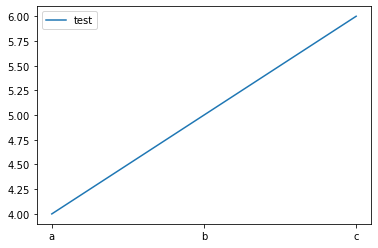

In [12]:
fig = plt.figure()  # figureオブジェクトを作成
ax = fig.add_subplot(1, 1, 1)  # figureに属するaxesオブジェクトを作成
ax.plot(x, y, label="test")
ax.legend()

### DataFrameをグラフにする

In [165]:
data = [{"p1": 1, "p2": 2}, {"p1": 3, "p2": 4}]

df = pd.DataFrame(data, index=["test1", "test2_aaaaaaaaaaaaaaa"])

In [166]:
df

,p1,p2
test1,1,2
test2_aaaaaaaaaaaaaaa,3,4


<AxesSubplot:>

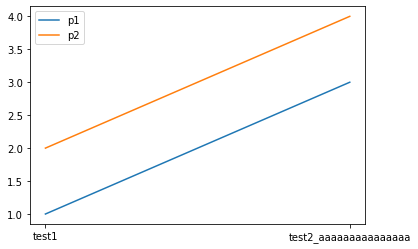

In [167]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 1])  # メモリ位置のリスト
# ax.set_xticklabels(["a", "b"])  # 表示値のリスト

# axでplotするとこうなる？
# ax.plot(df["p1"], label="p1", linestyle="-", marker="", markersize=15)
# ax.plot(df["p2"], label="p2", linestyle="", marker=".", markersize=10)
# ax.legend()

# dfでプロットするとこれ。結果は同じ
df.plot(ax=ax, legend=True)

### グラフのタイトルを表示する

<AxesSubplot:>

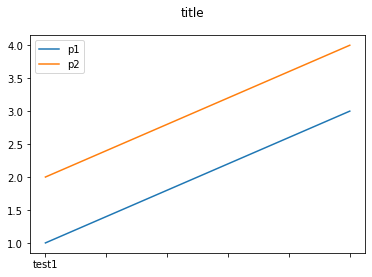

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.suptitle("title")
df.plot(ax=ax, legend=True)

### グラフに線を引く

In [171]:
data = [{"p1": 1, "p2": 2, "p3": 3}, {"p1": 3, "p2": 4, "p3": 3}]

df = pd.DataFrame(data, index=["test1", "test2"])

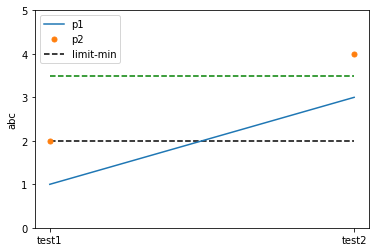

In [172]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 1])  # メモリ位置のリスト
ax.plot(df["p1"], label="p1", linestyle="-", marker="", markersize=15)
ax.plot(df["p2"], label="p2", linestyle="", marker=".", markersize=10)
ax.hlines(
    y=[2.0, 3.5],
    xmin=0,
    xmax=1,
    linestyles={"dashed"},
    colors=["black", "green"],
    label="limit-min",
)
ax.set_ylim(0, 5)
ax.set_ylabel("abc")
ax.legend()

In [221]:
data = [
    {"pin": "P1857A1_aaaaaaaaaaaaa", "tr": 40, "tf": 45},
    {"pin": "P1857A2", "tr": 45, "tf": 55},
    {"pin": "P1857A3", "tr": 50, "tf": 65},
]

df = pd.DataFrame(data)
df = df.set_index("pin")

In [222]:
df

,tr,tf
pin,,
P1857A1_aaaaaaaaaaaaa,40,45
P1857A2,45,55
P1857A3,50,65


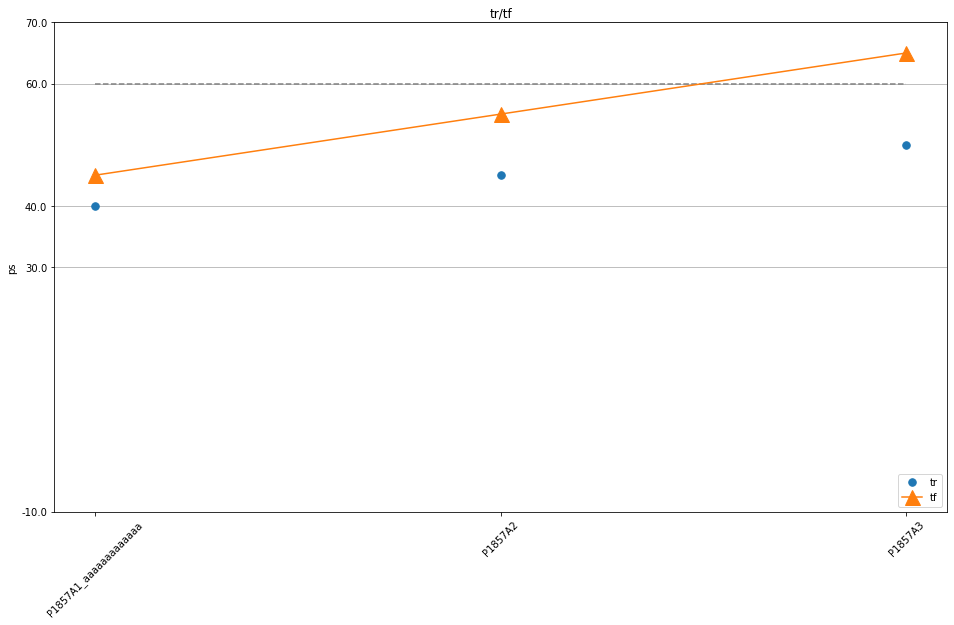

<Figure size 432x288 with 0 Axes>

In [223]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["tr"], label="tr", linestyle="", marker=".", markersize=15)
ax.plot(df["tf"], label="tf", linestyle="-", marker="^", markersize=15)
ax.set_ylim(-10, 70)

ax.set_ylabel("ps")
ax.set_title("tr/tf")
ax.set_yticks([-10, 30, 40, 60, 70])
ax.legend(loc="lower right")
ax.hlines(
    y=[60],
    xmin=0,
    xmax=2,
    linestyles={"dashed"},
    colors=["gray", "green"],
    label="limit-min",
)
ax.grid(axis="y")
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
# ax.set_xticklabels(df.index.values,rotation=45, ha="center")
ax.tick_params(axis="x", rotation=45)
# fig.subplots_adjust(bottom=0.2)
# ax.minorticks_on()
plt.show()
plt.savefig("a.png")

### sin波

Text(3.04, 0.095, '')

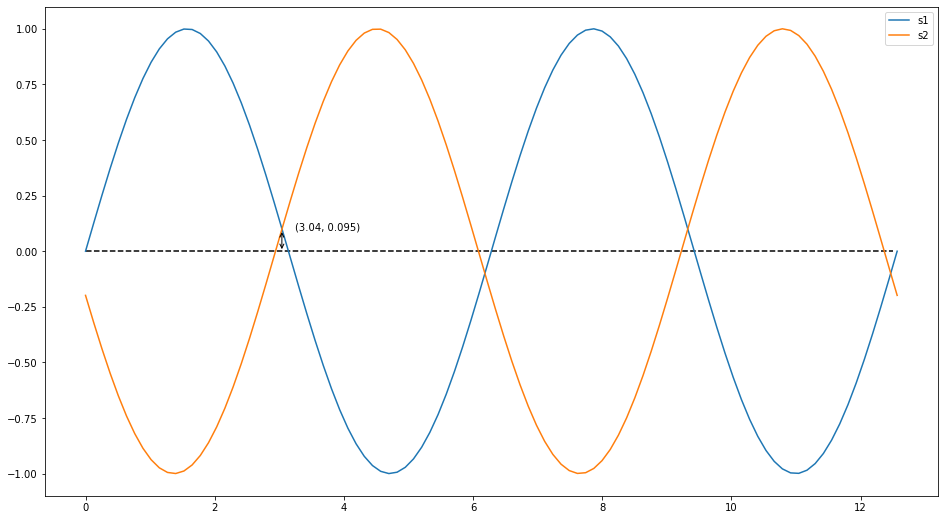

In [370]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
n = 100
x1 = np.linspace(0, 4 * np.pi, n)
x2 = np.linspace(1 * np.pi + 0.2, 5 * np.pi + 0.2, n)

idx = np.argwhere(np.sign(x2 - x1) == 0)

s1 = pd.Series(np.sin(x1), index=x1, name="s1")
s2 = pd.Series(np.sin(x2), index=x1, name="s2")

df = pd.concat([s1, s2], axis=1)

df.plot(ax=ax)
ax.hlines(y=0, xmin=0, xmax=len(df.index) / 8, color="black", linestyle="dashed")
x = 3.04
y = 0.095
ax.text(x + 0.2, y, f"({x}, {y})")

ax.annotate("", xy=[3.04, 0], xytext=[3.04, 0.095], arrowprops=dict(arrowstyle="<->"))

### Vix Program

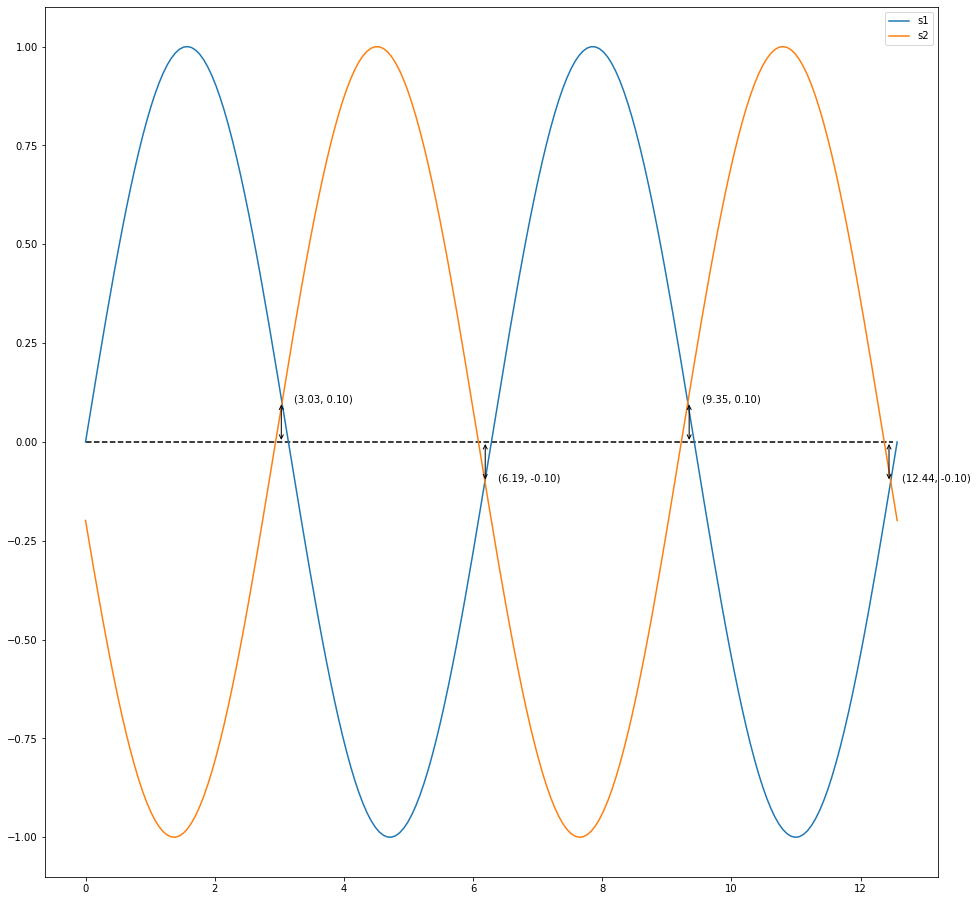

In [453]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=[16, 16])
ax = fig.add_subplot(1, 1, 1)
n = 200
x1 = np.linspace(0, 4 * np.pi, n)
x2 = np.linspace(1 * np.pi + 0.2, 5 * np.pi + 0.2, n)

idx = np.argwhere(np.sign(x2 - x1) == 0)

s1 = pd.Series(np.sin(x1), index=x1, name="s1")
s2 = pd.Series(np.sin(x2), index=x1, name="s2")

df = pd.concat([s1, s2], axis=1)

df["s2-s1"] = df["s2"] - df["s1"]

df_tmp = df
df_vix = pd.DataFrame()
for i in range(4):
    val1 = getNearestValue(df_tmp["s2-s1"].values.tolist(), 0)
    min_row1 = df_tmp[df_tmp["s2-s1"] == val1]
    df_vix = pd.concat([df_vix, min_row1])
    df_tmp = df_tmp.drop(min_row1.index)
df_vix["(s1+s2)/2"] = (df_vix["s1"] + df_vix["s2"]) / 2

df_vix = df_vix["(s1+s2)/2"]
df_vix = df_vix.reset_index()
df_vix_list = df_vix.values.tolist()

df = df.drop("s2-s1", axis=1)
df.plot(ax=ax)
ax.hlines(y=0, xmin=0, xmax=len(df.index) / 16, color="black", linestyle="dashed")

for df_vix_p in df_vix_list:
    x = df_vix_p[0]
    y = df_vix_p[1]
    ax.text(x + 0.2, y, f"({x:.2f}, {y:.2f})")
    ax.annotate("", xy=[x, 0], xytext=df_vix_p, arrowprops=dict(arrowstyle="<->"))

In [454]:
np.sin(x1)

array([ 0.00000000e+00,  6.31056313e-02,  1.25959705e-01,  1.88311666e-01,
        2.49912962e-01,  3.10518032e-01,  3.69885285e-01,  4.27778068e-01,
        4.83965601e-01,  5.38223906e-01,  5.90336692e-01,  6.40096223e-01,
        6.87304143e-01,  7.31772266e-01,  7.73323331e-01,  8.11791702e-01,
        8.47024034e-01,  8.78879879e-01,  9.07232251e-01,  9.31968129e-01,
        9.52988909e-01,  9.70210796e-01,  9.83565137e-01,  9.92998700e-01,
        9.98473878e-01,  9.99968847e-01,  9.97477646e-01,  9.91010207e-01,
        9.80592311e-01,  9.66265486e-01,  9.48086844e-01,  9.26128849e-01,
        9.00479032e-01,  8.71239643e-01,  8.38527236e-01,  8.02472214e-01,
        7.63218303e-01,  7.20921979e-01,  6.75751849e-01,  6.27887973e-01,
        5.77521152e-01,  5.24852163e-01,  4.70090958e-01,  4.13455834e-01,
        3.55172553e-01,  2.95473450e-01,  2.34596503e-01,  1.72784385e-01,
        1.10283499e-01,  4.73429900e-02, -1.57862420e-02, -7.88525454e-02,
       -1.41604519e-01, -

### sin

<AxesSubplot:>

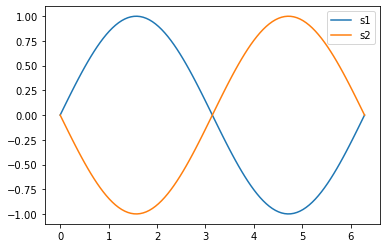

In [455]:
import numpy as np
import pandas as pd

n = 100
x1 = np.linspace(0, 2 * np.pi, n)
x2 = np.linspace(1 * np.pi, 3 * np.pi, n)

s1 = pd.Series(np.sin(x1), index=x1, name="s1")
s2 = pd.Series(np.sin(x2), index=x1, name="s2")

df = pd.concat([s1, s2], axis=1)

df.plot()